In [1]:
!pip install pyspark

     |████████████████████████████████| 212.3MB 64kB/s 
     |████████████████████████████████| 204kB 19.2MB/s 
  Created wheel for pyspark: filename=pyspark-3.1.1-py2.py3-none-any.whl size=212767604 sha256=333a61a2872d003d9fa59019b2c156af4a8653c1cb2e220b9b8a60cc128aa676
  Stored in directory: /root/.cache/pip/wheels/0b/90/c0/01de724414ef122bd05f056541fb6a0ecf47c7ca655f8b3c0f
Successfully built pyspark


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from pyspark.sql import SparkSession
import pyspark.sql.functions as F
import pyspark.sql.types as T

In [5]:
spark = SparkSession.builder.appName("sparkify").getOrCreate()

In [33]:
# load data
isOnColab = True # CHANGE THIS VARIABLE IF RUNNING ON DATAPROC

path = '/content/drive/MyDrive/datasets/dsnd-sparkify/event_labeled.parquet' if isOnColab else 'gs://udacity-dsnd/event_labeled.parquet'
df = spark.read.parquet(path)
path = '/content/drive/MyDrive/datasets/dsnd-sparkify/ml_df.parquet' if isOnColab else 'gs://udacity-dsnd/ml_df.parquet'
ml_df = spark.read.parquet(path)


In [34]:
ml_df.show(5)

+-------+-------------------+--------+----------+-------------+------------------+----------+-----------+---------+------------------+----------+-----+------+-----+-----+-------+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----------+-----+-----+-----+-----+-----+-----+-----+-----+--------+--------+-----+-----+--------+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+--------+-----+--------+-----+-----+-----+-----+-----+-----+-----+-----------+-----+-----+-----+-----+-----+-----+-----+--------+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+--------+-----+-----+-----+-----+
| userId|              up_ts|is_churn|song_count|subs_duration|         song_rate|n_playlist|thumbs_down|thumbs_up|      avg_sess_len|sess_count| ipad|iphone|linux|macos|windows|   AK|   AL|   A

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 131 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 131 missing from current font.
  font.set_text(s, 0, flags=flags)


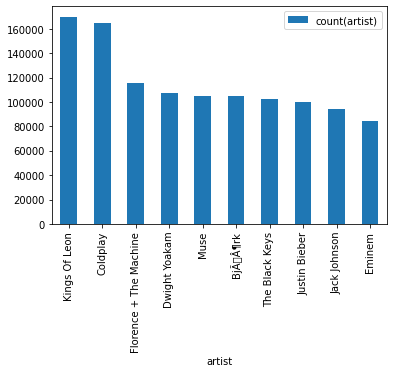

In [17]:
df.groupby("artist").agg(F.count("artist")).sort(F.col("count(artist)"), ascending=False).limit(10) \
    .toPandas().plot.bar(x="artist", y="count(artist)")

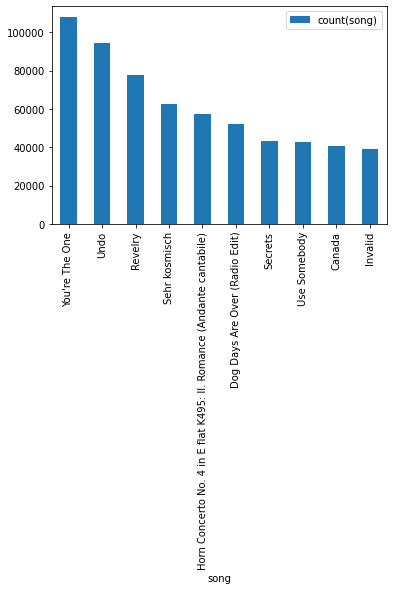

In [18]:
df.groupby("song").agg(F.count("song")).sort(F.col("count(song)"), ascending=False).limit(10) \
    .toPandas().plot.bar(x="song", y="count(song)")

In [22]:
df.groupby("gender").agg(F.count("gender")).show()

+------+-------------+
|gender|count(gender)|
+------+-------------+
|     F|     12181158|
|  null|            0|
|     M|     13299562|
+------+-------------+



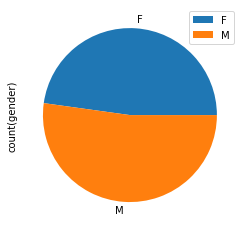

In [24]:
df.groupby("gender").agg(F.count("gender")) \
    .toPandas().groupby("gender").sum().plot.pie(y="count(gender)")

In [36]:
ml_df.groupby("userId").agg(F.max('ipad'), F.max('iphone'), F.max('macos'), F.max('windows'), F.max('linux')) \
    .unpivot()

+-------+---------+-----------+----------+------------+----------+
| userId|max(ipad)|max(iphone)|max(macos)|max(windows)|max(linux)|
+-------+---------+-----------+----------+------------+----------+
|1567623|    false|      false|     false|        true|     false|
|1114507|    false|      false|     false|        true|     false|
|1797408|    false|      false|     false|       false|      true|
|1338783|    false|      false|      true|       false|     false|
|1633577|    false|      false|      true|       false|     false|
|1994878|    false|      false|      true|       false|     false|
|1440693|    false|      false|     false|        true|     false|
|1030587|    false|      false|     false|        true|     false|
|1500901|    false|      false|     false|        true|     false|
|1796854|    false|      false|     false|        true|     false|
|1380035|    false|      false|      true|       false|     false|
|1133196|    false|      false|     false|        true|     fa